In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import numpy as np
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [52]:
df = pd.read_csv("data.csv")
df.head()

,Отметка времени,Кофе или чай?,Пол,Занимаетесь спортом?,Есть ли работа?,Есть ли сердечные заболевания?,Сова или Жаворонок,Есть ли молоко в холодильнике?,Время подъема,Административный округ,Время сна
0,19.09.2023 20:23:16,Чай,М,Да,Нет,Нет,Сова,Нет,Позднее 8 утра,Восточный административный округ,7-8 часов
1,19.09.2023 20:25:03,Кофе,Ж,Нет,Нет,Нет,Сова,Нет,Позднее 8 утра,Восточный административный округ,7-8 часов
2,19.09.2023 20:26:31,Чай,М,Нет,Да,Нет,Жаворонок,Да,6-7 утра,Восточный административный округ,От 3 до 6 часов
3,19.09.2023 20:27:02,Чай,М,Да,Нет,Нет,Сова,Нет,Позднее 8 утра,Восточный административный округ,7-8 часов
4,19.09.2023 20:27:16,Чай,Ж,Да,Да,Нет,Сова,Да,Позднее 8 утра,Восточный административный округ,Более 8 часов


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Отметка времени                 41 non-null     object
 1   Кофе или чай?                   41 non-null     object
 2   Пол                             41 non-null     object
 3   Занимаетесь спортом?            41 non-null     object
 4   Есть ли работа?                 41 non-null     object
 5   Есть ли сердечные заболевания?  41 non-null     object
 6   Сова или Жаворонок              41 non-null     object
 7   Есть ли молоко в холодильнике?  41 non-null     object
 8   Время подъема                   41 non-null     object
 9   Административный округ          40 non-null     object
 10  Время сна                       41 non-null     object
dtypes: object(11)
memory usage: 3.6+ KB


In [54]:
df_copy = df.copy()

In [55]:
rnm = {"Отметка времени" : "timestamp","Кофе или чай?": "target", "Пол": "sex",
       "Занимаетесь спортом?" : "sport", "Есть ли работа?": "job",
       "Есть ли сердечные заболевания?" : "heart_diseases","Сова или Жаворонок" : "is_owl",
       "Есть ли молоко в холодильнике?" : "milk_in_fridge",
       "Время подъема" : "get_time", "Административный округ" : "district",
       "Время сна" : "sleep_time"}

In [56]:
df_copy = df_copy.rename(columns = rnm)
df_copy.head()

,timestamp,target,sex,sport,job,heart_diseases,is_owl,milk_in_fridge,get_time,district,sleep_time
0,19.09.2023 20:23:16,Чай,М,Да,Нет,Нет,Сова,Нет,Позднее 8 утра,Восточный административный округ,7-8 часов
1,19.09.2023 20:25:03,Кофе,Ж,Нет,Нет,Нет,Сова,Нет,Позднее 8 утра,Восточный административный округ,7-8 часов
2,19.09.2023 20:26:31,Чай,М,Нет,Да,Нет,Жаворонок,Да,6-7 утра,Восточный административный округ,От 3 до 6 часов
3,19.09.2023 20:27:02,Чай,М,Да,Нет,Нет,Сова,Нет,Позднее 8 утра,Восточный административный округ,7-8 часов
4,19.09.2023 20:27:16,Чай,Ж,Да,Да,Нет,Сова,Да,Позднее 8 утра,Восточный административный округ,Более 8 часов


In [57]:
df_copy["target"] = df_copy["target"].map(lambda x: x == "Чай").astype(np.int8)
df_copy["sex"] = df_copy["sex"].map(lambda x: x == "М").astype(np.int8)
df_copy["sport"] = df_copy["sport"].map(lambda x: x == "Да").astype(np.int8)
df_copy["job"] = df_copy["job"].map(lambda x: x == 'Да').astype(np.int8)
df_copy["heart_diseases"] = df_copy["heart_diseases"].map(lambda x: x == "Да").astype(np.int8)
df_copy["is_owl"] = df_copy["is_owl"].map(lambda x: x == "Сова").astype(np.int8)
df_copy["milk_in_fridge"] = df_copy["milk_in_fridge"].map(lambda x: x == "Да").astype(np.int8)
df_copy = df_copy.replace({"get_time": {"Позднее 8 утра" : 10,
                                       "6-7 утра" : 7,
                                       "7-8 утра" : 8,
                                       "5-6 утра" : 6}})
df_copy = df_copy.replace({"sleep_time" : {"7-8 часов" : 8,
                                           "От 3 до 6 часов" : 4,
                                           "Более 8 часов" : 10,
                                           "Менее 3 часов" : 2}})
df_copy["district"] = pd.Categorical(df_copy["district"]).codes

In [58]:
df_copy = df_copy.drop(columns="timestamp")

In [59]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   target          41 non-null     int8 
 1   sex             41 non-null     int8 
 2   sport           41 non-null     int8 
 3   job             41 non-null     int8 
 4   heart_diseases  41 non-null     int8 
 5   is_owl          41 non-null     int8 
 6   milk_in_fridge  41 non-null     int8 
 7   get_time        41 non-null     int64
 8   district        41 non-null     int8 
 9   sleep_time      41 non-null     int64
dtypes: int64(2), int8(8)
memory usage: 1.1 KB


In [60]:
df_copy.head()

,target,sex,sport,job,heart_diseases,is_owl,milk_in_fridge,get_time,district,sleep_time
0,1,1,1,0,0,1,0,10,0,8
1,0,0,0,0,0,1,0,10,0,8
2,1,1,0,1,0,0,1,7,0,4
3,1,1,1,0,0,1,0,10,0,8
4,1,0,1,1,0,1,1,10,0,10


In [61]:
y = df_copy["target"]
X = df_copy.drop(columns = "target")

In [62]:
clf = KNeighborsClassifier(n_neighbors=6, p = 2)

In [63]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, train_size = 0.9, random_state=1)


In [64]:
clf.fit(X_train, y_train)
preds = clf.predict(X_valid)
print(f"accuracy: {accuracy_score(y_valid, preds)}")
print(f"precision: {precision_score(y_valid, preds)}")
print(f"recall: {recall_score(y_valid, preds)}")
print(f"f1: {f1_score(y_valid, preds)}")

accuracy: 0.8
precision: 0.8
recall: 1.0
f1: 0.888888888888889


In [65]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_copy.values)
df_copy['pca-one'] = pca_result[:,0]
df_copy['pca-two'] = pca_result[:,1]
print('principal component: {}'.format(pca.explained_variance_ratio_))

principal component: [0.58797134 0.26384806]


<ipython-input-66-089d297eb8c8>:9: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(


<Axes: xlabel='pca-one', ylabel='pca-two'>

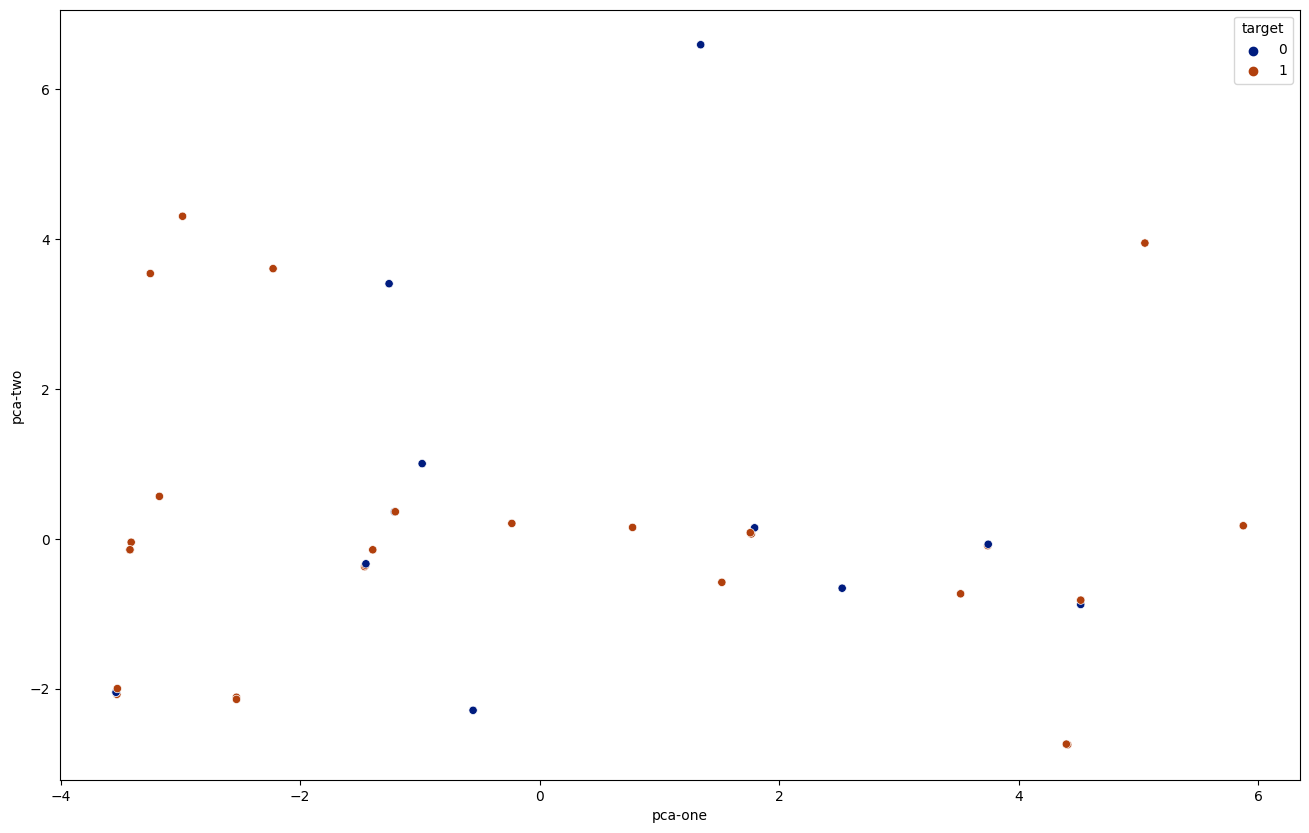

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(16,10))

# np.random.seed(42)
rndperm = np.random.permutation(df_copy.shape[0])

sns.scatterplot(
    x="pca-one", y="pca-two",
    hue = y,
    palette=sns.color_palette("dark"),
    data=df_copy,
    legend="full",
    #alpha=0.3
)